<a href="https://colab.research.google.com/github/reallylongaddress/abnb_preprocessor/blob/master/Notebooks/EDA_Full_DataFrame.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [50]:
import os
import numpy as np
import pandas as pd
from google.colab import drive
import matplotlib.pyplot as plt
from sklearn.inspection import permutation_importance
from sklearn.linear_model import LinearRegression
import sklearn

In [2]:
drive = drive.mount('/content/drive/')
data_path = '/content/drive/My Drive/Colab_Data/AirBnb/Italy/Sicily/'


Mounted at /content/drive/


In [3]:
file_path = data_path + 'derived/full_df_10496.csv'
df = pd.read_csv(file_path)
print(f'df.shape: {df.shape}')
df.columns

df.shape: (10496, 58)


Index(['Unnamed: 0', 'id', 'listing_url', 'last_scraped', 'host_since',
       'host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_total_listings_count', 'latitude',
       'longitude', 'property_type', 'room_type', 'accommodates',
       'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'minimum_nights',
       'maximum_nights', 'minimum_minimum_nights', 'maximum_minimum_nights',
       'minimum_maximum_nights', 'maximum_maximum_nights',
       'minimum_nights_avg_ntm', 'maximum_nights_avg_ntm', 'has_availability',
       'availability_30', 'availability_60', 'availability_90',
       'availability_365', 'number_of_reviews', 'number_of_reviews_ltm',
       'number_of_reviews_l30d', 'first_review', 'last_review',
       'review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'review_scores_location',
       'review_scores_value', 'instant_booka

In [4]:
interesting_columns = ['id', 'listing_url', 'number_of_reviews_l30d', 'reviews_per_month', 'price_float', 'geo_common_name', 'sale_low', 'sale_mean', 'sale_high', 'revenue_1', 'revenue_2', 'num_reviews_1_years']
df = df[interesting_columns]

In [5]:
df.head()

,id,listing_url,number_of_reviews_l30d,reviews_per_month,price_float,geo_common_name,sale_low,sale_mean,sale_high,revenue_1,revenue_2,num_reviews_1_years
0,137342,https://www.airbnb.com/rooms/137342,1,0.08,110.0,Ragusa,638.0,924.0,1894.0,2640.0,2640.0,2
1,307482,https://www.airbnb.com/rooms/307482,1,0.22,145.0,Palermo,915.0,1324.0,2128.0,4350.0,2610.0,3
2,3765138,https://www.airbnb.com/rooms/3765138,1,0.15,56.0,Palermo,915.0,1324.0,2128.0,3920.0,784.0,7
3,3847293,https://www.airbnb.com/rooms/3847293,3,0.89,54.0,Catania,751.0,1194.0,1715.0,8100.0,5184.0,15
4,3882447,https://www.airbnb.com/rooms/3882447,1,1.90,51.0,Modica,329.0,967.0,1297.0,5100.0,3060.0,10


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f34f1ad8510>,
      dtype=object)

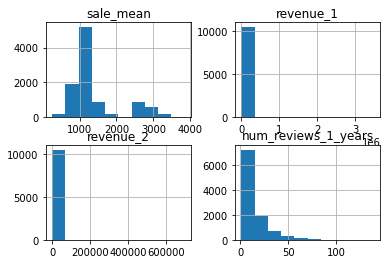

In [6]:
df[['sale_mean', 'revenue_1', 'revenue_2', 'num_reviews_1_years']].hist()

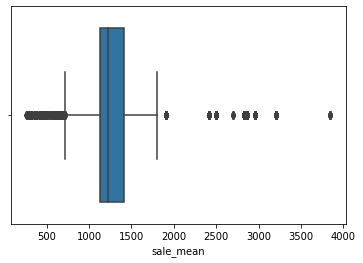

In [7]:
import seaborn as sns
sns.boxplot(x=df['sale_mean'])


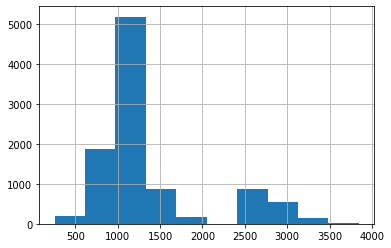

In [8]:
df['sale_mean'].hist()

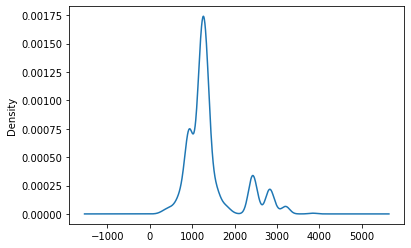

In [9]:
df['sale_mean'].plot.kde()

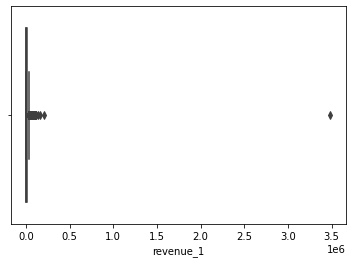

In [10]:
sns.boxplot(x=df['revenue_1'])

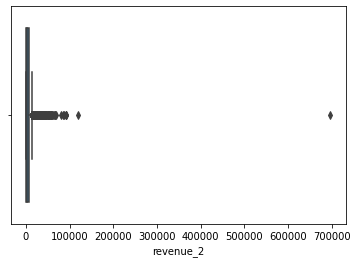

In [11]:
sns.boxplot(x=df['revenue_2'])

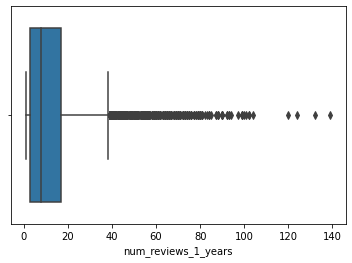

In [12]:
sns.boxplot(x=df['num_reviews_1_years'])

## Trim outliers

In [13]:
df['revenue_2'].describe()


count     10496.000000
mean       5206.511795
std        9578.929365
min          24.000000
25%        1092.000000
50%        2911.200000
75%        6528.400000
max      697068.000000
Name: revenue_2, dtype: float64

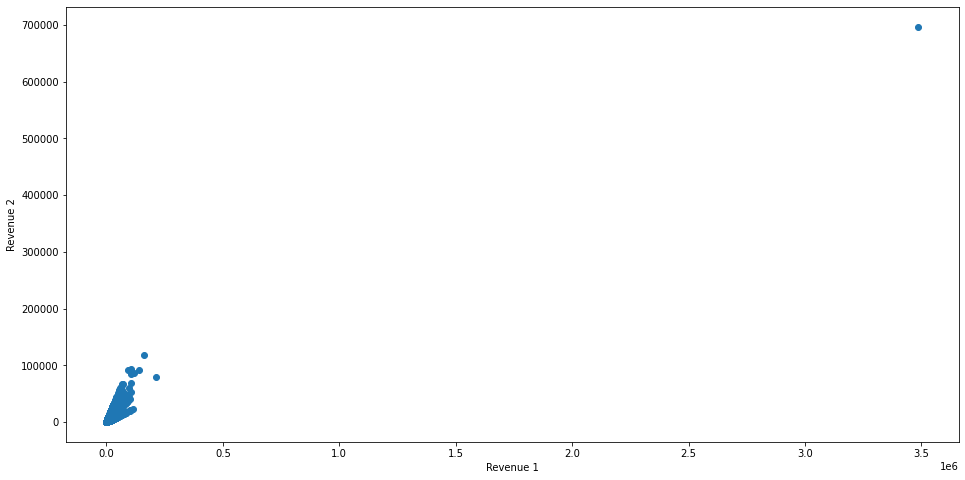

In [14]:
fig, ax = plt.subplots(figsize=(16,8))
ax.scatter(df['revenue_1'], df['revenue_2'])
ax.set_xlabel('Revenue 1')
ax.set_ylabel('Revenue 2')
plt.show()

In [15]:
#trim outliers
df = df[df['revenue_2'] <= 100000]
df = df[df['revenue_1'] <= 130000]


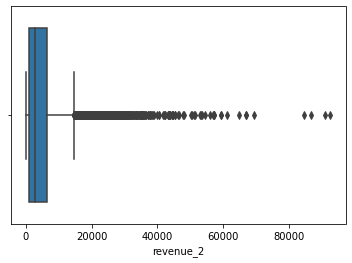

In [16]:
sns.boxplot(x=df['revenue_2'])

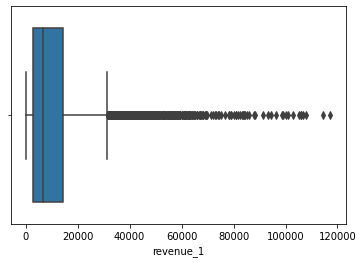

In [17]:
sns.boxplot(x=df['revenue_1'])

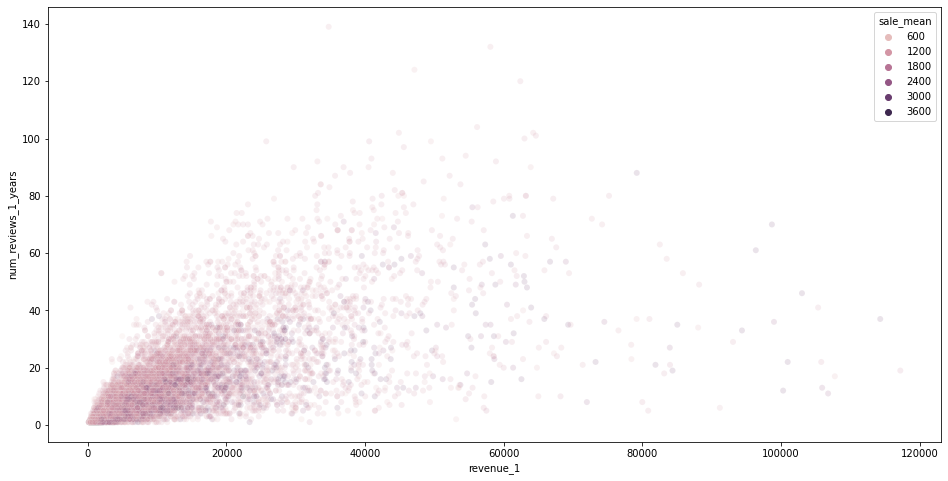

In [18]:
fig, ax = plt.subplots(figsize=(16,8))
g = sns.scatterplot(x="revenue_1", y="num_reviews_1_years",
              hue="sale_mean", alpha=.15,
              data=df);
# g.set(xscale="log");

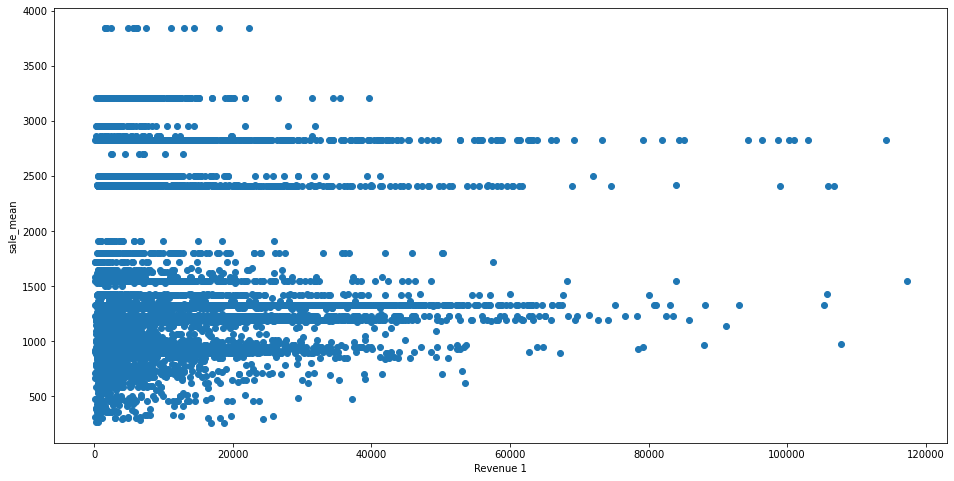

In [19]:
fig, ax = plt.subplots(figsize=(16,8))
ax.scatter(df['revenue_1'], df['sale_mean'])
ax.set_xlabel('Revenue 1')
ax.set_ylabel('sale_mean')
plt.show()

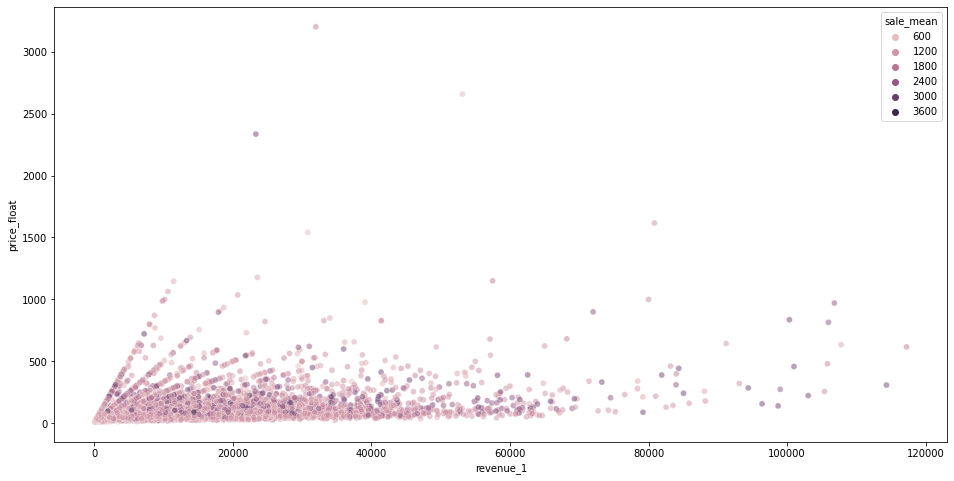

In [20]:
fig, ax = plt.subplots(figsize=(16,8))
g = sns.scatterplot(x="revenue_1", y="price_float",
              hue="sale_mean", alpha=.5,
              data=df);
# g.set(xscale="log");

In [21]:
df.head()

,id,listing_url,number_of_reviews_l30d,reviews_per_month,price_float,geo_common_name,sale_low,sale_mean,sale_high,revenue_1,revenue_2,num_reviews_1_years
0,137342,https://www.airbnb.com/rooms/137342,1,0.08,110.0,Ragusa,638.0,924.0,1894.0,2640.0,2640.0,2
1,307482,https://www.airbnb.com/rooms/307482,1,0.22,145.0,Palermo,915.0,1324.0,2128.0,4350.0,2610.0,3
2,3765138,https://www.airbnb.com/rooms/3765138,1,0.15,56.0,Palermo,915.0,1324.0,2128.0,3920.0,784.0,7
3,3847293,https://www.airbnb.com/rooms/3847293,3,0.89,54.0,Catania,751.0,1194.0,1715.0,8100.0,5184.0,15
4,3882447,https://www.airbnb.com/rooms/3882447,1,1.90,51.0,Modica,329.0,967.0,1297.0,5100.0,3060.0,10


In [22]:
df2 = df.copy()
df2 = df2[['number_of_reviews_l30d', 'price_float', 'sale_mean', 'revenue_1', 'revenue_2', 'num_reviews_1_years']]
df2

,number_of_reviews_l30d,price_float,sale_mean,revenue_1,revenue_2,num_reviews_1_years
0,1,110.0,924.0,2640.0,2640.0,2
1,1,145.0,1324.0,4350.0,2610.0,3
2,1,56.0,1324.0,3920.0,784.0,7
3,3,54.0,1194.0,8100.0,5184.0,15
4,1,51.0,967.0,5100.0,3060.0,10
...,...,...,...,...,...,...
10491,1,30.0,928.0,600.0,120.0,2
10492,1,160.0,724.0,1600.0,320.0,1
10493,2,70.0,1229.0,1400.0,560.0,2
10494,1,51.0,1229.0,1020.0,244.8,2


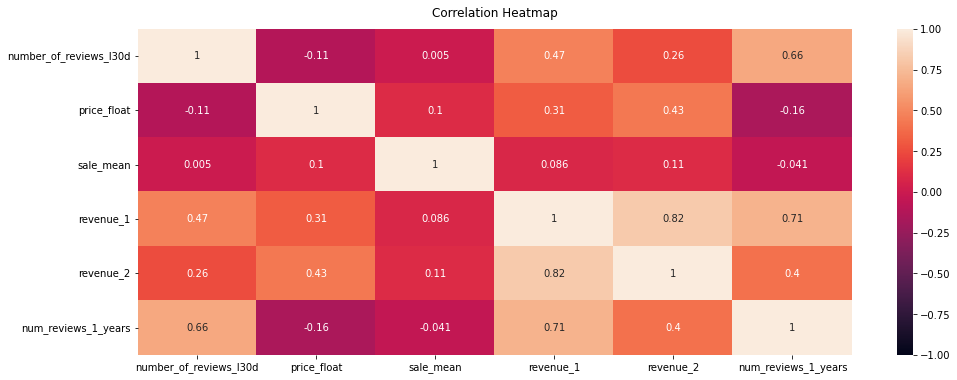

In [23]:
plt.figure(figsize=(16, 6))

heatmap = sns.heatmap(df2.corr(), vmin=-1, vmax=1, annot=True)

heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

In [40]:
#calculate revenue_mean for y
df2['revenue_mean'] = (df2['revenue_1'] + df2['revenue_2'])/2

#drop rows if we don't have a sale_mean
df2 = df2[df2['sale_mean'].notna()]

y = df2.copy()['revenue_mean']

# X = other columns
X = df2.copy().drop(columns=['number_of_reviews_l30d', 'revenue_1', 'revenue_2', 'revenue_mean'])
#Calculate feature importance to revenue
#https://machinelearningmastery.com/calculate-feature-importance-with-python/

In [41]:
y

0        2640.0
1        3480.0
2        2352.0
3        6642.0
4        4080.0
          ...  
10491     360.0
10492     960.0
10493     980.0
10494     632.4
10495     912.0
Name: revenue_mean, Length: 9863, dtype: float64

In [42]:
X

,price_float,sale_mean,num_reviews_1_years
0,110.0,924.0,2
1,145.0,1324.0,3
2,56.0,1324.0,7
3,54.0,1194.0,15
4,51.0,967.0,10
...,...,...,...
10491,30.0,928.0,2
10492,160.0,724.0,1
10493,70.0,1229.0,2
10494,51.0,1229.0,2


## Feature Selection

https://towardsdatascience.com/5-feature-selection-method-from-scikit-learn-you-should-know-ed4d116e4172

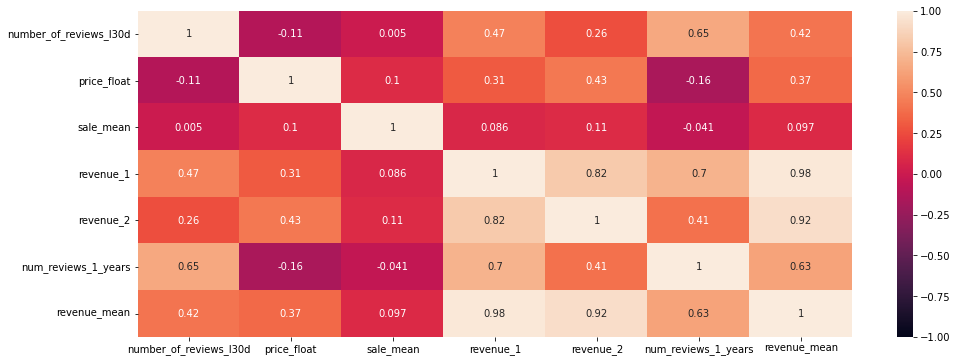

In [43]:
plt.figure(figsize=(16, 6))

heatmap = sns.heatmap(df2.corr(), vmin=-1, vmax=1, annot=True)

In [44]:
X.isna().sum()

price_float            0
sale_mean              0
num_reviews_1_years    0
dtype: int64

In [45]:
X.shape

(9863, 3)

In [65]:
# sorted(sklearn.metrics.SCORERS.keys())

Feature: 0  Score: 81.02538379442603
Feature: 1  Score: 1810.8654770030093
Feature: 2  Score: 4419.121677944265


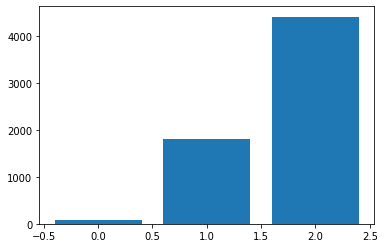

In [54]:

# from matplotlib import pyplot

# define dataset
# X, y = make_classification(n_samples=1000, n_features=10, n_informative=5, random_state=1)
# define the model
# model = KNeighborsClassifier()
# fit the model
model = LinearRegression()
model.fit(X, y)
# perform permutation importance
results = permutation_importance(model, X, y, scoring='neg_mean_absolute_error')
# get importance
importance = results.importances_mean
importance=np.sort(importance)
# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: {}  Score: {}' .format(i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))] ,importance)
plt.show()


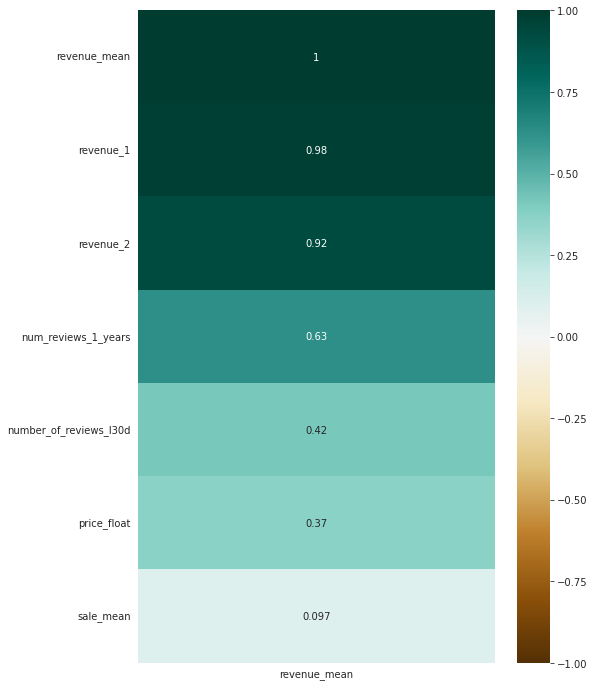

In [63]:
df2.corr()[['revenue_mean']].sort_values(by='revenue_mean', ascending=False)

plt.figure(figsize=(8, 12))
heatmap = sns.heatmap(df2.corr()[['revenue_mean']].sort_values(by='revenue_mean', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')

In [64]:
from sklearn.feature_selection import SelectKBest, mutual_info_regression
#Select top 2 features based on mutual info regression
selector = SelectKBest(mutual_info_regression, k =2)
selector.fit(X, y)
X.columns[selector.get_support()]

Index(['price_float', 'num_reviews_1_years'], dtype='object')